# Universidad Abierta y a Distancia.
## Estudiante: Brayan Manuel Granados Navarro.
### Predicción de presencia de enfermedad cardíaca.

In [626]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay, accuracy_score, roc_auc_score, ConfusionMatrixDisplay

In [628]:
# lectura de datos en Python y lo cargamos en la variable Datos
Datos = pd.read_csv('C:/Users/brayg/OneDrive - Universidad Nacional Abierta y a Distancia/UNAD/2025/PERIODO 16-01/ANÁLISIS DE DATOS/Tarea 3 - Algoritmos de Aprendizaje Supervisado/heart_cleveland_upload.csv')

In [630]:
# Realizamos lectura de los Datos para el análisis exploratorio
Datos.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [632]:
# Verificar valores faltantes por columna
print(Datos.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [634]:
# Posibles outliers
print(Datos.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

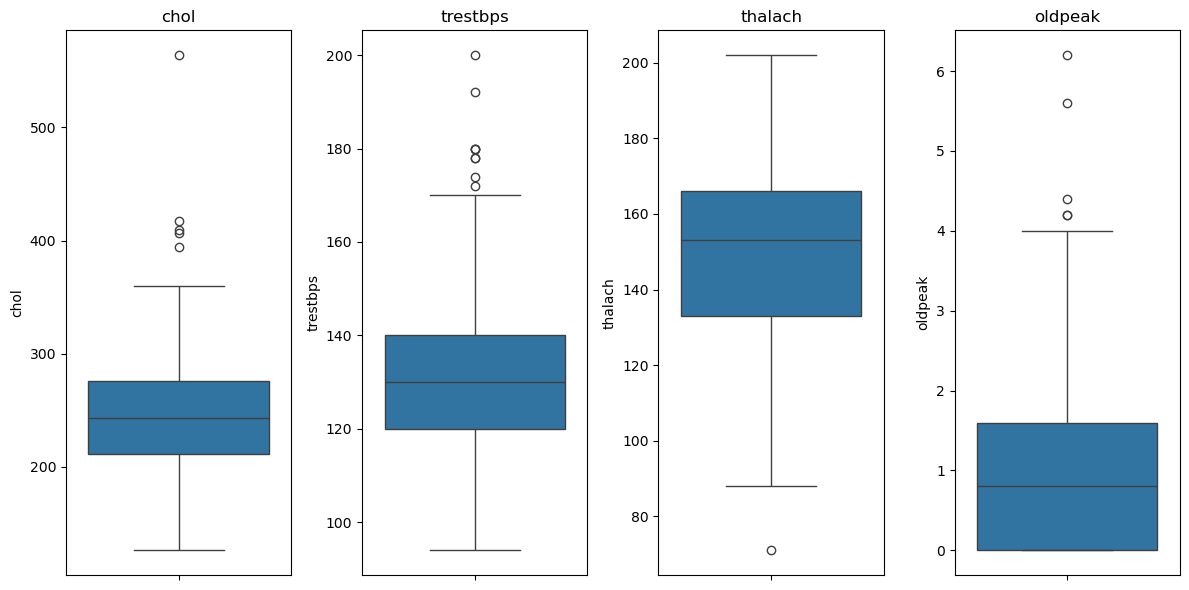

In [636]:
# Columnas a analizar
columnas_especificas = ['chol', 'trestbps', 'thalach', 'oldpeak']

# Boxplot por cada columna
plt.figure(figsize=(12, 6))
for i, col in enumerate(columnas_especificas, 1):
    plt.subplot(1, len(columnas_especificas), i)
    sns.boxplot(y=Datos[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [637]:
# eliminar outliers por columna
z_scores = stats.zscore(Datos.select_dtypes(include=[np.number]))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
Datos = Datos[filtered_entries]

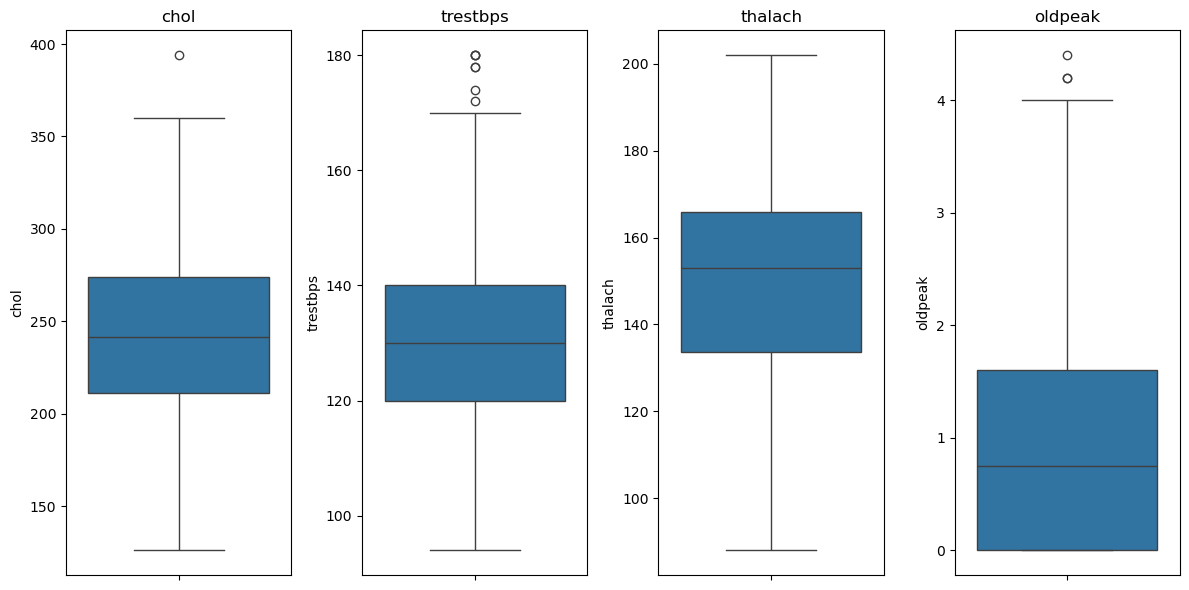

In [640]:
# Lista de columnas que quieres analizar
columnas_especificas = ['chol', 'trestbps', 'thalach', 'oldpeak']

# Crear un boxplot por cada columna
plt.figure(figsize=(12, 6))
for i, col in enumerate(columnas_especificas, 1):
    plt.subplot(1, len(columnas_especificas), i)
    sns.boxplot(y=Datos[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [642]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = 'condition'  # Donde 0 = sano, >0 = algún grado de enfermedad

In [644]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(Datos[features], 
                                                    Datos[target], 
                                                    test_size=0.3, 
                                                    random_state=42)

# Modelo Random Forest (robusto para datos médicos)
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Informe completo
print(classification_report(y_test, y_pred, target_names=['No Enfermedad', 'Enfermedad']))

# Métricas adicionales
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

               precision    recall  f1-score   support

No Enfermedad       0.93      0.84      0.88        50
   Enfermedad       0.81      0.92      0.86        37

     accuracy                           0.87        87
    macro avg       0.87      0.88      0.87        87
 weighted avg       0.88      0.87      0.87        87



,precision,recall,f1-score,support
0,0.933333,0.840000,0.884211,50.000000
1,0.809524,0.918919,0.860759,37.000000
accuracy,0.873563,0.873563,0.873563,0.873563
macro avg,0.871429,0.879459,0.872485,87.000000
weighted avg,0.880679,0.873563,0.874237,87.000000


In [646]:
# Modelo de prediccion
Prediccion = modelo.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [648]:
# Predecir probabilidades (no solo clases binarias)
probabilidades = modelo.predict_proba(Datos[features])[:,1]

# Crear columna de riesgo
Datos['riesgo_cardiaco'] = probabilidades

# Clasificar por riesgo (umbral ajustable)
Datos['riesgo_futuro'] = np.where(Datos['riesgo_cardiaco'] > 0.7, 
                                'Alto riesgo', 
                                np.where(Datos['riesgo_cardiaco'] > 0.4, 
                                        'Riesgo moderado', 
                                        'Bajo riesgo'))

# Mostrar personas con mayor riesgo
print(Datos.sort_values('riesgo_cardiaco', ascending=False)[['age', 'sex', 'chol', 'oldpeak', 'riesgo_cardiaco', 'riesgo_futuro']].head(10))

     age  sex  chol  oldpeak  riesgo_cardiaco riesgo_futuro
200   60    1   258      2.8             1.00   Alto riesgo
216   58    1   259      3.0             1.00   Alto riesgo
199   60    1   282      2.8             1.00   Alto riesgo
260   51    1   298      4.2             1.00   Alto riesgo
214   58    1   216      2.2             1.00   Alto riesgo
198   60    1   206      2.4             1.00   Alto riesgo
241   55    1   289      0.8             1.00   Alto riesgo
237   56    1   184      2.1             0.99   Alto riesgo
282   43    1   177      2.5             0.99   Alto riesgo
252   53    1   282      2.0             0.99   Alto riesgo


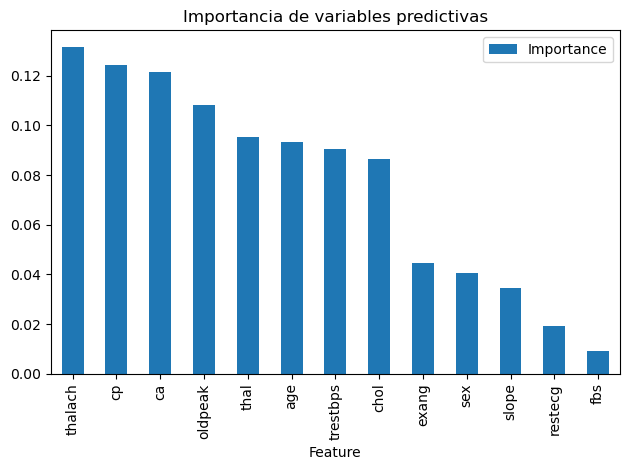

In [650]:

importances = modelo.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance.sort_values('Importance', ascending=False).plot.bar(x='Feature', y='Importance')
plt.title('Importancia de variables predictivas')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

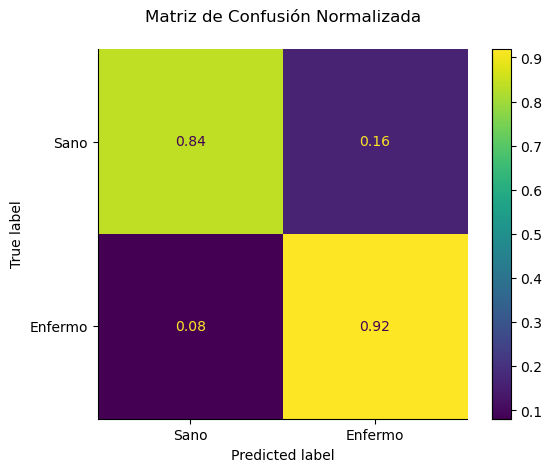

In [652]:
#Matriz de Confusión 
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test,
                                    display_labels=['Sano', 'Enfermo'],
                                    normalize='true',
                                    values_format='.2f')
plt.title('Matriz de Confusión Normalizada', pad=20)
plt.grid(False)
sns.despine()
plt.show()

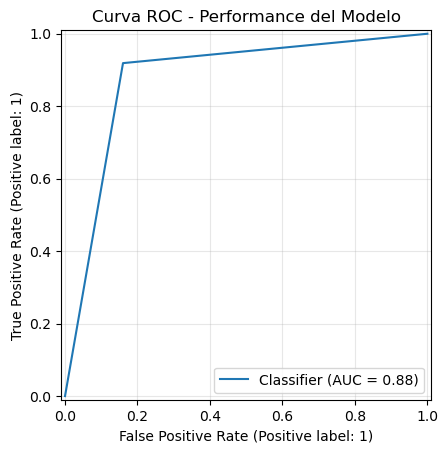

In [656]:
#Curva ROC con Área Bajo la Curva

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, Prediccion)
plt.title('Curva ROC - Performance del Modelo')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()



La variable objetivo es predecir la presencia de enfermedad cardíaca utilizando un modelo basado en el dataset heart_cleveland_upload.csv. Para ello, se evaluó el comportamiento de la variable objetivo y su impacto en el rendimiento del modelo predictivo.

Inicialmente, se cargaron las librerías necesarias y se importó el dataset. Se realizó una revisión para identificar valores faltantes y atípicos, enfocándose en las columnas con datos numéricos. Además, se generaron boxplots para visualizar la presencia de outliers. Posteriormente, estos outliers fueron eliminados y se comparó el dataset original con el depurado para observar las diferencias.

Precisión:
Cuando el modelo predice que un paciente está sano, acierta en el 93% de los casos, con solo un 7% de falsos negativos (pacientes enfermos clasificados como sanos).
En el caso de predicciones de enfermedad cardíaca, el modelo es correcto en el 81% de los casos, mientras que el 19% corresponde a falsos positivos.

Sensibilidad:
El modelo identifica correctamente al 84% de los pacientes sanos, pero clasifica incorrectamente al 16% como enfermos (falsos positivos).
Para los casos reales de enfermedad cardíaca, el modelo logra una tasa de detección del 92%, fallando solo en el 8% (falsos negativos), lo cual es especialmente relevante en contextos médicos.

F1-Score:
Ambas clases presentan puntuaciones F1 altas y equilibradas, lo que indica que el modelo mantiene un buen balance entre precisión y recall en la clasificación de pacientes sanos y enfermos.

Matriz de Confusión:
Se observa que el 84% de los pacientes sanos fueron correctamente clasificados, mientras que el 92% de los pacientes con enfermedad cardíaca también fueron correctamente identificados. Por otro lado, el 16% de los sanos fueron clasificados erróneamente como enfermos y el 8% de los enfermos fueron diagnosticados incorrectamente como sanos.

Curva ROC y AUC:
Con un valor de AUC de 0.88, el modelo muestra una buena capacidad de discriminación, cercana al rango excelente. Esto indica que es especialmente efectivo para identificar casos positivos, respaldado por su alta sensibilidad del 92%.